In [3]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import linregress

import matplotlib.pyplot as plt
import fnmatch
plt.style.use('default')

In [4]:
import sys
from pathlib import Path
# rdkit.__path__

In [5]:
packages_list = os.listdir('/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages/')
packages_list

['flatbuffers-24.3.25.dist-info',
 'fastjsonschema',
 'mistune.py',
 'h5py-3.11.0.dist-info',
 'selenium',
 'appnope',
 'mdurl',
 'packaging',
 'opt_einsum',
 'keras',
 'pytrie.py',
 'executing-0.8.3.dist-info',
 'multisplitby-0.0.1.dist-info',
 'PyQtChart-5.12.dist-info',
 'pyasn1',
 'google_auth-2.18.1-py3.9-nspkg.pth',
 'absl_py-1.4.0.dist-info',
 'decorator-5.1.1.dist-info',
 'more_click',
 'ffmpeg',
 'pydantic_core-2.18.4.dist-info',
 'mkl_random',
 'traitlets-5.1.1.dist-info',
 'tzdata-2024.1.dist-info',
 'beautifulsoup4-4.11.1.dist-info',
 'pyperclip',
 'networkx',
 'jupyterlab-3.4.4.dist-info',
 'package_readme.md',
 'wcwidth',
 'numpy-1.23.5.dist-info',
 'idna-3.3.dist-info',
 'websocket',
 'markupsafe',
 'charset_normalizer-2.0.4.dist-info',
 'smmap-5.0.1.dist-info',
 'jupyter_core',
 'google_auth_oauthlib',
 'pandocfilters-1.5.0.dist-info',
 'pyfiglet-0.8.post1.dist-info',
 'ptyprocess-0.7.0.dist-info',
 'sortedcontainers',
 'widgetsnbextension',
 'typing_extensions-4.12.1.d

In [6]:
import rdkit
sys.path

['/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/experiments/Use_of_Synthetic_data',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python39.zip',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload',
 '',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages']

In [7]:
# Define the project folder name
project_name = "Chapter_DNA_Modelling"

# Get the current directory
current_path = Path().resolve()

# Traverse up the directory structure until the project folder is found
for parent in current_path.parents:
    if parent.name == project_name:
        project_root = parent
        break
else:
    raise FileNotFoundError(f"Project folder '{project_name}' not found in any parent directory.")

# Add the project src directory to sys.path
# sys.path.append(str(project_root / 'src'))
sys.path.append(str(project_root))
sys.path

['/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/experiments/Use_of_Synthetic_data',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python39.zip',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/lib-dynload',
 '',
 '/Users/ivanyankov/opt/anaconda3/envs/linear/lib/python3.9/site-packages',
 '/Users/ivanyankov/Documents/Chapter_DNA_Modelling']

In [8]:
# If using subfolders within src
from src.data.data_processing import load_data
from src.models import modeldev

# from .src.training.train_single_task import train_model, create_train_test_split
# from src.training.evaluate import evaluate_model
# from src.utils.utils import get_project_root

2024-09-10 15:39:05.604355: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
# MT_CNN=model.CNNMultiTaskModel(hp='',num_tasks=1,task_names=['Tm'])

MT_CNN=modeldev.CNNMultiTaskModel(input_shape=(81,1),num_tasks=1,task_names=['Tm']).build_model()

2024-09-10 15:39:08.421557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 15:39:08.421722: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
home=os.getcwd()
home
data_path='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/'

In [12]:

data_path='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/'
df=pd.read_csv(data_path+'Lz_IY.csv')
X_df=df[['Tm','DNA']]
X_df
df2=pd.read_csv(data_path+'Mac_CNN_single_task.csv')
df2['DNA']=df2['Sequence']
X_df=pd.merge(X_df, df2, on='DNA', how='inner')
X_df=X_df.drop(['Unnamed: 0','DNA','Sequence'],axis=1)
X_df

,Tm,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,16.9,434,60,635,343,273,47,310,408,634,...,818,634,94,828,463,354,69,413,558,811
1,27.9,514,73,736,396,323,57,359,474,747,...,942,747,114,962,534,418,84,477,649,957
2,32.0,594,86,837,449,373,67,408,540,860,...,1066,860,134,1096,605,482,99,541,740,1103
3,35.7,434,60,687,203,273,47,548,514,634,...,742,634,94,903,284,354,69,738,675,811
4,37.0,434,60,662,201,273,47,522,512,634,...,773,634,94,872,284,354,69,702,670,811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,434,60,792,120,273,47,724,573,634,...,617,634,94,1073,161,354,69,985,774,811
301,32.9,434,60,728,118,273,47,669,553,634,...,675,634,94,973,164,354,69,907,724,811
302,69.2,1074,164,1566,387,673,127,1289,1182,1538,...,1632,1538,254,2083,535,866,189,1732,1558,1979
303,35.8,434,60,692,113,273,47,621,536,634,...,700,634,94,921,162,354,69,841,696,811


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np

In [15]:
# Splitting data into features and target
X = X_df.drop(columns=['Tm'])
y = X_df['Tm']

# Performing the train-validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
# Reshaping X_train and X_val for CNN (adding a channel dimension)
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))

# Fitting the model
history = MT_CNN.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
7/7 [==============================] - 0s 56ms/step - loss: 35.6203 - mse: 35.6203 - mean_absolute_error: 4.5769 - r2_func_tf: 0.7171 - rmse_func_tf: 5.9940 - bias_func_tf: 0.5356 - sdep_func_tf: 5.7128 - val_loss: 65.3058 - val_mse: 65.3058 - val_mean_absolute_error: 6.5353 - val_r2_func_tf: 0.6948 - val_rmse_func_tf: 7.9984 - val_bias_func_tf: -5.0627 - val_sdep_func_tf: 6.1893
Epoch 2/50
7/7 [==============================] - 0s 49ms/step - loss: 42.7860 - mse: 42.7860 - mean_absolute_error: 5.0394 - r2_func_tf: 0.6863 - rmse_func_tf: 6.4305 - bias_func_tf: -0.2852 - sdep_func_tf: 5.5708 - val_loss: 79.0872 - val_mse: 79.0872 - val_mean_absolute_error: 7.2471 - val_r2_func_tf: 0.6292 - val_rmse_func_tf: 8.8149 - val_bias_func_tf: -6.2924 - val_sdep_func_tf: 6.1686
Epoch 3/50
7/7 [==============================] - 0s 49ms/step - loss: 33.3134 - mse: 33.3134 - mean_absolute_error: 4.4919 - r2_func_tf: 0.7812 - rmse_func_tf: 5.5823 - bias_func_tf: 0.1624 - sdep_func_tf: 5.40

In [56]:
history.model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 81, 1)]           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 40, 32)            128       
                                                                 
 maxpooling_1 (MaxPooling1D)  (None, 20, 32)           0         
                                                                 
 batchnorm_1 (BatchNormaliza  (None, 20, 32)           128       
 tion)                                                           
                                                                 
 conv1d_2 (Conv1D)           (None, 9, 32)             3104      
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 32)            0         
                                                           

In [60]:
# history.model.predict()
# Evaluate on validation set
val_loss = history.model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation MAE: ')

# Save the model
history.model.save('mt_cnn_model.h5')


3/3 [==============================] - 0s 21ms/step - loss: 16.8375 - mse: 16.8375 - mean_absolute_error: 3.2658 - r2_func_tf: 0.9214 - rmse_func_tf: 4.0727 - bias_func_tf: 1.4756 - sdep_func_tf: 3.7805
Validation Loss: [16.837528228759766, 16.837528228759766, 3.265846014022827, 0.9214274883270264, 4.072707653045654, 1.475584864616394, 3.7804787158966064], Validation MAE: 


In [22]:
df=pd.read_csv(data_path+'Lz_IY.csv')
X_df=df[['Tm','DNA']]
X_df
df2=pd.read_csv(data_path+'Mac_CNN_single_task.csv')
df2['DNA']=df2['Sequence']
X_df_iy=pd.merge(X_df, df2, on='DNA', how='inner')
X_df_iy=X_df_iy.drop(['Unnamed: 0','Sequence'],axis=1)
X_df_iy
# Search for the substring 'gtgaac' in all columns
mask = X_df_iy.apply(lambda row: row.astype(str).str.contains('gtgaac').any(), axis=1)
mask = X_df_iy.apply(lambda row: row.astype(str).str.contains('gtagctac').any(), axis=1)

# Extract the rows that contain the substring
matching_rows = X_df_iy[mask]
matching_rows

,Tm,DNA,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
262,36.3,gtagctac,434,60,711,176,273,47,593,525,...,700,634,94,945,243,354,69,800,700,811


In [19]:
gtgaac_df=pd.read_csv('DNA_Score_gtgaac.csv')
gtgaac_df=gtgaac_df.drop('Unnamed: 0',axis=1)
gtgaac_df

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,274,34,457,138,173,27,354,329,408,34,...,503,408,54,602,190,226,39,482,436,519
1,288,34,453,139,172,27,352,329,404,34,...,496,401,52,613,193,226,39,481,432,532
2,290,35,457,139,171,27,354,326,402,34,...,499,406,53,621,193,231,39,487,435,532
3,290,34,457,139,170,27,351,327,405,34,...,497,404,52,616,192,224,39,483,435,534
4,291,35,457,139,172,27,351,327,402,34,...,499,404,52,614,192,225,39,485,435,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,145,11,356,135,87,9,282,260,197,6,...,426,209,24,465,179,113,14,368,348,291
1597,203,9,338,127,106,11,277,244,263,6,...,409,263,21,459,171,139,17,370,336,356
1598,239,13,354,119,130,13,292,256,296,19,...,416,290,28,445,153,162,21,388,342,385
1599,255,25,373,127,138,22,296,259,323,13,...,430,332,42,472,165,188,27,385,346,446


In [20]:
gtgaac_df

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,274,34,457,138,173,27,354,329,408,34,...,503,408,54,602,190,226,39,482,436,519
1,288,34,453,139,172,27,352,329,404,34,...,496,401,52,613,193,226,39,481,432,532
2,290,35,457,139,171,27,354,326,402,34,...,499,406,53,621,193,231,39,487,435,532
3,290,34,457,139,170,27,351,327,405,34,...,497,404,52,616,192,224,39,483,435,534
4,291,35,457,139,172,27,351,327,402,34,...,499,404,52,614,192,225,39,485,435,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,145,11,356,135,87,9,282,260,197,6,...,426,209,24,465,179,113,14,368,348,291
1597,203,9,338,127,106,11,277,244,263,6,...,409,263,21,459,171,139,17,370,336,356
1598,239,13,354,119,130,13,292,256,296,19,...,416,290,28,445,153,162,21,388,342,385
1599,255,25,373,127,138,22,296,259,323,13,...,430,332,42,472,165,188,27,385,346,446


In [21]:
X=gtgaac_df[:2].to_numpy()
X
i=0
X_new = X[i]

# Reshape the new data for the CNN model (if necessary)
X_new = X_new.reshape(1, -1, 1)

print(X_new.shape, X_val.shape)

(1, 81, 1) (92, 81)


In [23]:
history.model.predict(matching_rows[matching_rows.columns[2:]].to_numpy().reshape(1,-1,1))

NameError: name 'history' is not defined

# Load Custom Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import custom_object_scope
import numpy as np

# Define the custom metric function
def r2_func_tf(y_true, y_pred):
    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

def r2_func_tf(y_true, y_pred, **kwargs):
        numerator = tf.reduce_sum(tf.square(y_true - y_pred))
        denominator = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
        r2 = 1 - numerator / denominator
        return r2

def rmse_func_tf(y_true, y_pred, **kwargs):
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    return rmse

def bias_func_tf(y_true, y_pred, **kwargs):
    bias = tf.reduce_mean(y_true - y_pred)
    return bias

def sdep_func_tf(y_true, y_pred, **kwargs):
    diff = y_true - y_pred
    mean_diff = tf.reduce_mean(diff)
    sdep = tf.sqrt(tf.reduce_mean(tf.square(diff - mean_diff)))
    return sdep

# Load the model with the custom metric
custom_objects = {'r2_func_tf': r2_func_tf,
                  'rmse_func_tf': rmse_func_tf,
                  'bias_func_tf': bias_func_tf,
                  'sdep_func_tf': sdep_func_tf,}

with custom_object_scope(custom_objects):
    model = load_model('mt_cnn_model.h5')



In [24]:
matching_rows[matching_rows.columns[2:]]

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
262,434,60,711,176,273,47,593,525,634,60,...,700,634,94,945,243,354,69,800,700,811


In [25]:
temp=pd.read_csv('DNA_Score_gtagctac.csv')
temp

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,434,60,711,176,273,47,593,525,634,60,...,700,634,94,945,243,354,69,800,700,811
1,456,61,708,177,270,47,591,521,627,61,...,694,624,92,963,248,350,69,809,695,834
2,457,61,707,179,271,47,592,519,633,63,...,692,628,90,957,246,356,69,805,694,833
3,457,60,711,177,272,47,589,524,628,62,...,689,629,90,955,245,353,69,807,691,827
4,457,62,708,178,271,47,588,520,629,60,...,698,630,91,959,247,353,69,803,691,834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,378,46,526,139,209,38,483,420,479,38,...,578,491,77,700,193,278,53,651,551,633
1597,235,19,482,128,135,15,434,356,296,3,...,514,315,31,632,173,183,24,582,477,419
1598,276,37,467,130,153,25,424,349,374,20,...,564,348,46,591,173,205,34,563,462,482
1599,380,32,576,154,212,32,506,450,469,25,...,564,493,64,771,203,283,46,672,606,644


In [17]:
import subprocess

In [26]:
X_new_str
X_new = np.fromstring(X_new_str, sep=',')
# X_new = X_new.reshape(1, -1, 1) 
# X_new.astype('float')
X_new
# X_new = X_new.reshape(1, -1, 1) 
# X_new

NameError: name 'X_new_str' is not defined

In [27]:
# # Assuming `matching_rows` contains your data
# X = temp.to_numpy()
# results2 = []

# # for i in range(len(X)):

# X_new = X[0].astype('float')
# X_new_str = ','.join(map(str, X_new))  # Convert NumPy array to comma-separated string

# # Call the model executable and pass the input data as a command-line argument
# result = subprocess.run(
#     ['./exe', X_new_str],
#     stdout=subprocess.PIPE,
#     text=True
# )

# # Capture the predictions from the executable's output
# predictions = result.stdout.strip()

# # Convert the predictions back to a list/array and store it
# predictions = eval(predictions)  # Convert string output back to a list (be cautious with eval)
# results2.append(predictions)

# # Print the predictions
# print(predictions)

In [28]:
matching_rows
# # Example of new data
X=matching_rows[matching_rows.columns[2:]].to_numpy()
X=temp.to_numpy()
results2=[]
for i in range(len(X)):
    X_new = X[i].astype('float')

    # Reshape the new data for the CNN model (if necessary)
    X_new = X_new.reshape(1, -1, 1)

    # Make predictions
    predictions = model.predict(X_new)
    results2.append(predictions)
    # Print the predictions
    print(predictions)
# X[0]

2024-09-10 15:40:43.107140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 404ms/step
[[36.064842]]
1/1 [==============================] - 0s 27ms/step
[[36.58913]]
1/1 [==============================] - 0s 23ms/step
[[36.42646]]
1/1 [==============================] - 0s 23ms/step
[[36.14195]]
1/1 [==============================] - 0s 24ms/step
[[36.745872]]
1/1 [==============================] - 0s 25ms/step
[[36.226368]]
1/1 [==============================] - 0s 24ms/step
[[36.362553]]
1/1 [==============================] - 0s 24ms/step
[[36.40791]]
1/1 [==============================] - 0s 23ms/step
[[36.5622]]
1/1 [==============================] - 0s 24ms/step
[[36.657276]]
1/1 [==============================] - 0s 23ms/step
[[35.960804]]
1/1 [==============================] - 0s 23ms/step
[[36.314816]]
1/1 [==============================] - 0s 23ms/step
[[36.261723]]
1/1 [==============================] - 0s 24ms/step
[[36.5319]]
1/1 [==============================] - 0s 23ms/step
[[35.87331]]
1/1 [=============

In [29]:
np.array(results2)
np.array(results2)
results2[0][0][0]

36.064842

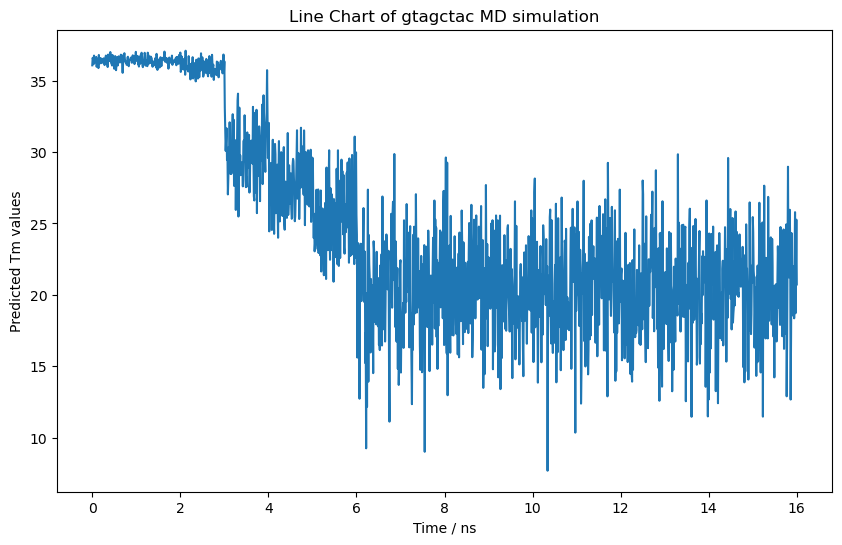

In [30]:
values = [x[0][0] for x in results2]
# Plotting
plt.figure(figsize=(10, 6))
# Plot each column

plt.plot((temp.index*10000*0.000001), values)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Predicted Tm values')
plt.title('Line Chart of gtagctac MD simulation')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
plt.savefig(f'gtagctac_time_series_5_10ns.png')
plt.show()

In [88]:
# history.model.predict(X_val)

# # Example of new data
X=gtgaac_df.to_numpy()
results=[]
for i in range(len(X)):
    X_new = X[i]

    # Reshape the new data for the CNN model (if necessary)
    X_new = X_new.reshape(1, -1, 1)

    # Make predictions
    predictions = history.model.predict(X_new)
    results.append(predictions)
    # Print the predictions
    print(predictions)

1/1 [==============================] - 0s 28ms/step
[[22.236423]]
1/1 [==============================] - 0s 27ms/step
[[22.398294]]
1/1 [==============================] - 0s 24ms/step
[[22.281954]]
1/1 [==============================] - 0s 26ms/step
[[22.393576]]
1/1 [==============================] - 0s 24ms/step
[[22.292868]]
1/1 [==============================] - 0s 25ms/step
[[22.168955]]
1/1 [==============================] - 0s 25ms/step
[[22.06582]]
1/1 [==============================] - 0s 25ms/step
[[22.243303]]
1/1 [==============================] - 0s 24ms/step
[[22.052755]]
1/1 [==============================] - 0s 25ms/step
[[22.204443]]
1/1 [==============================] - 0s 25ms/step
[[22.515703]]
1/1 [==============================] - 0s 25ms/step
[[22.410728]]
1/1 [==============================] - 0s 24ms/step
[[21.987143]]
1/1 [==============================] - 0s 25ms/step
[[22.105223]]
1/1 [==============================] - 0s 26ms/step
[[22.951368]]
1/1 [======

In [104]:
values = [x[0][0] for x in results]

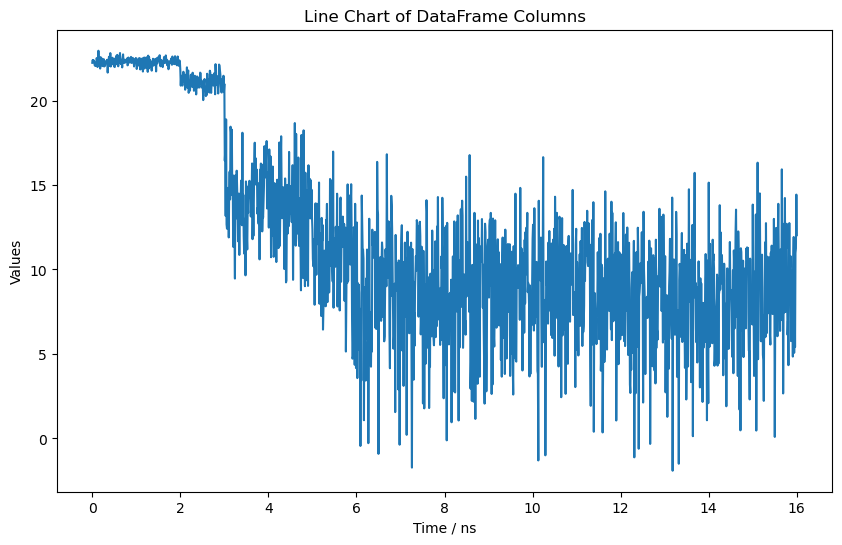

In [105]:

# Plotting
plt.figure(figsize=(10, 6))
# Plot each column

plt.plot((temp_df.index*10000*0.000001), values)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns') 
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

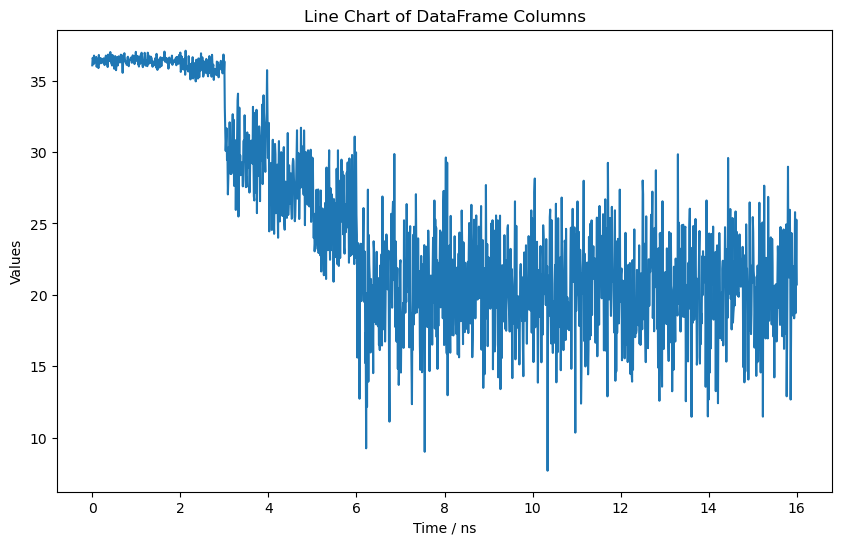

In [33]:

# Plotting
plt.figure(figsize=(10, 6))
# Plot each column

plt.plot((temp_df.index*10000*0.000001), values)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns') 
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

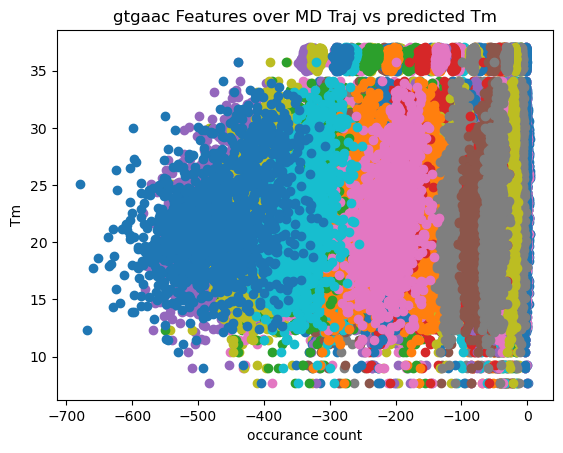

In [114]:
# values
for column in temp_df.columns:
    plt.scatter(temp_df[column], values)
    # plt.show()
plt.title('gtgaac Features over MD Traj vs predicted Tm')
plt.ylabel('Tm')
plt.xlabel(f'occurance count')
plt.savefig('gtgaac Features over MD Traj vs predicted Tm.png')


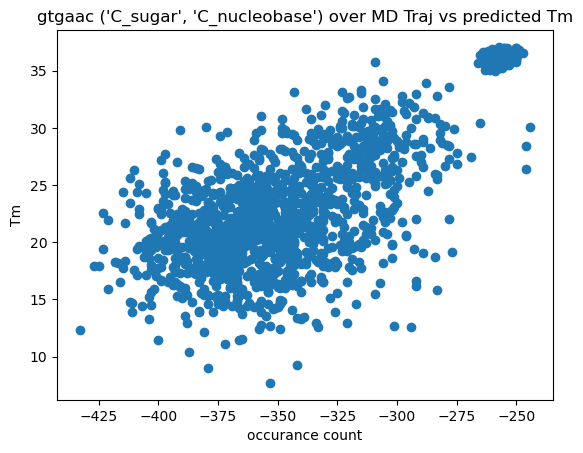

In [116]:
i=2
plt.scatter(temp_df[temp_df.columns[i]], values)
    # plt.show()
plt.title(f'gtgaac {temp_df.columns[i]} over MD Traj vs predicted Tm')
plt.ylabel('Tm')
plt.xlabel(f'occurance count')
plt.savefig(f'gtgaac {temp_df.columns[i]} over MD Traj vs predicted Tm.png')

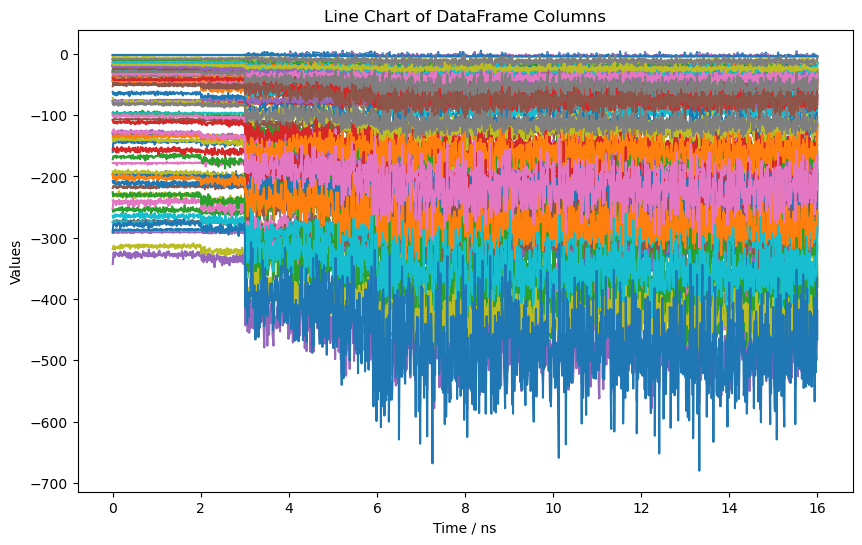

In [32]:
# Assuming you want to subtract the first row of matching_rows from all rows of gtgaac_df
row_to_subtract = matching_rows.iloc[0][matching_rows.columns[2:]].values

# Subtracting the row from all rows of gtgaac_df
temp_df = gtgaac_df.sub(row_to_subtract, axis=1)
temp_df

# Plotting
plt.figure(figsize=(10, 6))
# Plot each column
for column in temp_df.columns:
    plt.plot((temp_df.index*10000*0.000001), temp_df[column], label=column)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

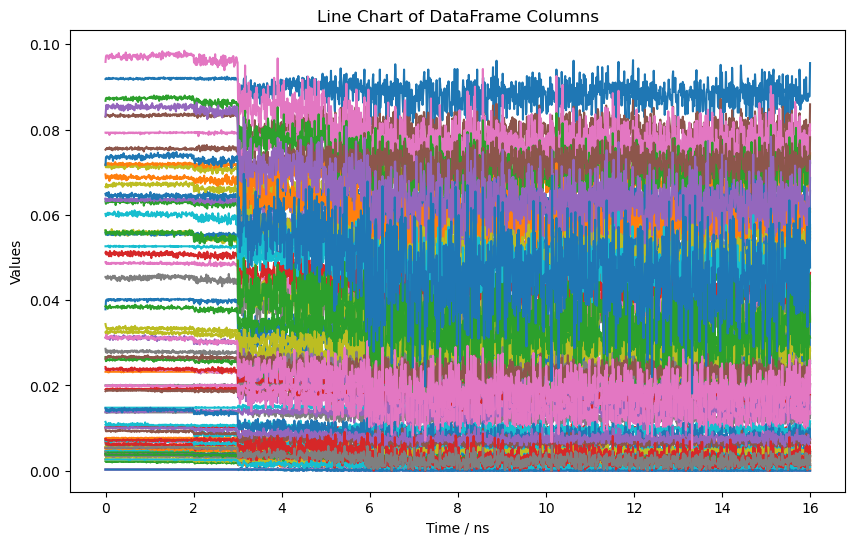

In [34]:
volume = (4 / 3) * np.pi * 12**3
# Plotting
plt.figure(figsize=(10, 6))

# Plot each column
for column in gtgaac_df.columns:
    plt.plot((gtgaac_df.index*10000*0.000001), gtgaac_df[column]/volume, label=column)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Values')
plt.title('Line Chart of DataFrame Columns')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
# plt.savefig(f'{seq}_time_series_5_10ns.png')
plt.show()

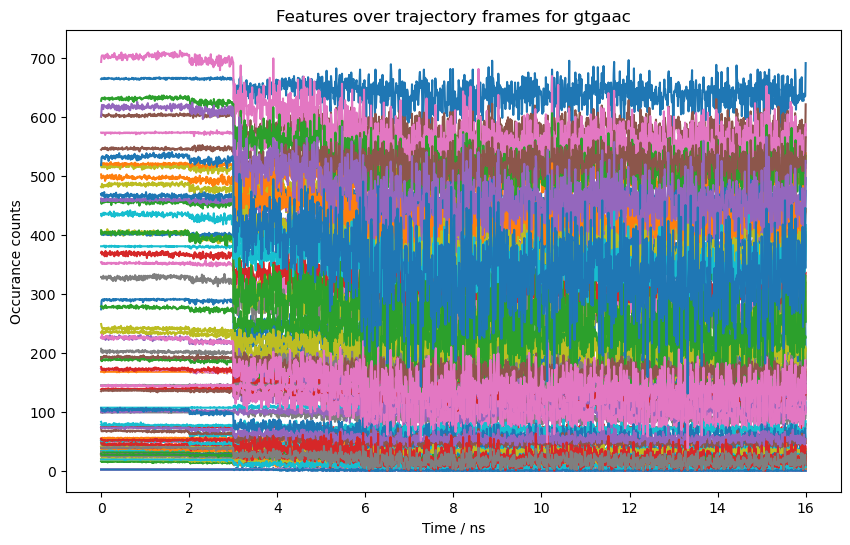

In [36]:

# Plotting
plt.figure(figsize=(10, 6))

# Plot each column
for column in gtgaac_df.columns:
    plt.plot((gtgaac_df.index*10000*0.000001), gtgaac_df[column], label=column)

# Adding labels and title
plt.xlabel('Time / ns')
plt.ylabel('Occurance counts')
plt.title('Features over trajectory frames for gtgaac')
# plt.legend(bbox_to_anchor=(1.4, 1),loc='upper right')

# Show plot
plt.savefig(f'Features_over_trajectory_gtgaac_time_series_5_10ns.png')
plt.show()

# Visualise DNAScore as an image 9x9, normalise and compare B A C

In [37]:

def load_dataframe(input_string, Type='C'):
    """
    Loads a DataFrame from a CSV file based on the input string and type.
    
    Parameters:
    input_string (str): The input string used in the file name.
    Type (str): The type of file, default is 'C'.
    
    Returns:
    pd.DataFrame: The loaded DataFrame from the CSV file.
    """
    # Construct the relative file path
    relative_path = f'./DNAScore_traj/{Type}/{input_string}'
    
    # Check if the file exists
    if not os.path.exists(relative_path):
        raise FileNotFoundError(f"File not found at {relative_path}")
    
    # Load the CSV file into a DataFrame
    df = pd.read_csv(relative_path)
    
    return df

In [38]:
def feature_vector_to_matrix(df):
    """
    Transforms the first row of a DataFrame with 81 features into a 9x9 matrix.
    
    Parameters:
    df (pd.DataFrame): DataFrame with 81 columns (features).
    
    Returns:
    np.ndarray: 9x9 matrix.
    """
    # Extract the first row as a feature vector
    feature_vector = df.iloc[0].values
    
    # Reshape the feature vector (1D array) into a 9x9 matrix
    matrix = feature_vector.reshape(9, 9)
    
    return matrix

In [67]:
df[df['DNA'].str.contains('CAAATCAAAG', case=False, na=False)]


,ID,Branch,DNA,dH,dS,dG,Tm,NN_dH,NN_dS,NN_dG,...,CountDNA_pos_A,CountDNA_pos_G,CountDNA_pos_C,CountDNA_pos_T,CountDNA_pos_Tot,CountDNAp_pos_A,CountDNAp_pos_G,CountDNAp_pos_C,CountDNAp_pos_T,CountDNAp_pos_Tot
68,69,8DD,caaatcaaag,-75.1,-213.0,-9.0,41.6,-70.9,-201.6,-8.3,...,6,1,2,1,10,0.6,0.1,0.2,0.1,10


In [39]:
input_string = 'DNA_Score_CAAATCAAAG_CAAATCAAAT_ATTTGATTTG.csv'
df_a = load_dataframe(input_string, Type='A')
df_b = load_dataframe(input_string, Type='B')
df_c = load_dataframe(input_string, Type='C')

matrix_a=feature_vector_to_matrix(df_a)
matrix_b=feature_vector_to_matrix(df_b)
matrix_c=feature_vector_to_matrix(df_c)

In [40]:
feature_vector_to_matrix(temp)

array([[434,  60, 711, 176, 273,  47, 593, 525, 634],
       [ 60,   4,  98,  40,  48,   4,  92,  94,  94],
       [711,  98, 953, 204, 375,  60, 752, 820, 946],
       [176,  40, 204,  46,  98,  25, 154, 177, 243],
       [273,  48, 375,  98, 168,  33, 321, 284, 354],
       [ 47,   4,  60,  25,  33,   4,  69,  58,  69],
       [593,  92, 752, 154, 321,  69, 601, 655, 800],
       [525,  94, 820, 177, 284,  58, 655, 678, 700],
       [634,  94, 945, 243, 354,  69, 800, 700, 811]])

In [41]:
matrix_a

array([[ 271,   47,  672,  260,  132,   17,  487,  514,  392],
       [  47,   28,  117,   58,   40,   13,   82,  164,   74],
       [ 725,  125, 1312,  385,  371,   71,  791, 1217,  953],
       [  94,   16,  146,   47,   54,    9,   85,  137,  134],
       [ 130,   40,  333,  152,   46,   15,  256,  304,  190],
       [  17,   12,   63,   32,   15,    6,   47,   90,   32],
       [ 676,  139, 1098,  320,  355,   72,  692, 1032,  909],
       [ 607,  175, 1184,  343,  351,   99,  725, 1087,  829],
       [ 392,   73,  891,  356,  190,   31,  656,  724,  572]])

In [42]:
matrix_b

array([[ 493,   31,  866,  312,  262,   35,  644,  615,  631],
       [  31,    4,   67,   49,   22,    0,   93,  133,   71],
       [ 925,   84, 1306,  382,  483,   64,  864, 1139, 1216],
       [ 120,   18,  155,   47,   64,   12,   88,  134,  152],
       [ 261,   22,  433,  170,  155,   20,  324,  329,  363],
       [  34,    0,   50,   35,   20,    0,   54,   72,   53],
       [ 827,  129, 1140,  313,  426,   79,  727,  990, 1092],
       [ 651,  144, 1068,  320,  359,   78,  700,  921,  900],
       [ 623,   73, 1143,  399,  364,   53,  842,  868,  871]])

In [43]:
matrix_c

array([[ 585,  105,  801,  284,  332,   68,  633,  594,  803],
       [ 106,   33,  113,   58,   80,   21,   96,  140,  160],
       [ 868,  133, 1047,  314,  497,   80,  708,  893, 1167],
       [ 118,   22,  122,   38,   73,   18,   82,  104,  165],
       [ 332,   80,  462,  173,  187,   50,  366,  326,  451],
       [  68,   22,   68,   46,   50,   13,   66,   71,   86],
       [ 801,  131,  909,  272,  462,   92,  603,  788, 1056],
       [ 587,  151,  822,  258,  339,   81,  556,  739,  837],
       [ 805,  162, 1082,  389,  462,   87,  837,  852, 1136]])

In [44]:

def normalize_matrices(mat1, mat2, mat3):
    """
    Normalize each pixel in the three 9x9 matrices based on the shared min and max value 
    for that specific pixel position across all three matrices.

    Parameters:
    mat1, mat2, mat3 (np.ndarray): Three 9x9 matrices.

    Returns:
    tuple: Normalized matrices for mat1, mat2, and mat3.
    """
    # Stack matrices along a new axis to compare pixel-wise min and max across the three matrices
    stacked = np.stack([mat1, mat2, mat3], axis=-1)

    # Compute the min and max for each pixel across the three matrices
    min_values = np.min(stacked, axis=-1)
    max_values = np.max(stacked, axis=-1)

    # Avoid division by zero in cases where min == max
    diff = max_values - min_values
    diff[diff == 0] = 1  # To prevent division by zero, we set the difference to 1 for these pixels

    # Normalize each matrix
    norm_mat1 = (mat1 - min_values) / diff
    norm_mat2 = (mat2 - min_values) / diff
    norm_mat3 = (mat3 - min_values) / diff

    return norm_mat1, norm_mat2, norm_mat3

In [45]:
norm_mat1, norm_mat2, norm_mat3 = normalize_matrices(matrix_a, matrix_b, matrix_c)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmaps_with_shared_legend(mat1, mat2, mat3):
    """
    Plots heatmaps for three 9x9 matrices in one row with a common colorbar.
    
    Parameters:
    mat1, mat2, mat3 (np.ndarray): Three 9x9 normalized matrices.
    """
    # Create a figure with 1 row and 3 columns
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Set the global color scale (vmin, vmax) based on the range across all matrices
    vmin = min(np.min(mat1), np.min(mat2), np.min(mat3))
    vmax = max(np.max(mat1), np.max(mat2), np.max(mat3))
    
    # Plot each matrix with a consistent color scale (vmin and vmax) across all heatmaps
    sns.heatmap(mat1, ax=axes[0], cmap="Greys", vmin=vmin, vmax=vmax, cbar=False)
    axes[0].set_title('Matrix 1')
    
    sns.heatmap(mat2, ax=axes[1], cmap="Greys", vmin=vmin, vmax=vmax, cbar=False)
    axes[1].set_title('Matrix 2')
    
    sns.heatmap(mat3, ax=axes[2], cmap="Greys", vmin=vmin, vmax=vmax, cbar=True, cbar_kws={"shrink": 0.8})
    axes[2].set_title('Matrix 3')
    
    # Add a common colorbar at the bottom
    cbar_ax = fig.add_axes([0.92, 0.25, 0.02, 0.5])  # Adjust position and size for shared colorbar
    norm = plt.Normalize(vmin=vmin, vmax=vmax)
    sm = plt.cm.ScalarMappable(cmap="Greys", norm=norm)
    sm.set_array([])
    fig.colorbar(sm, cax=cbar_ax)
    
    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar
    plt.show()

/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_31492/2900923557.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


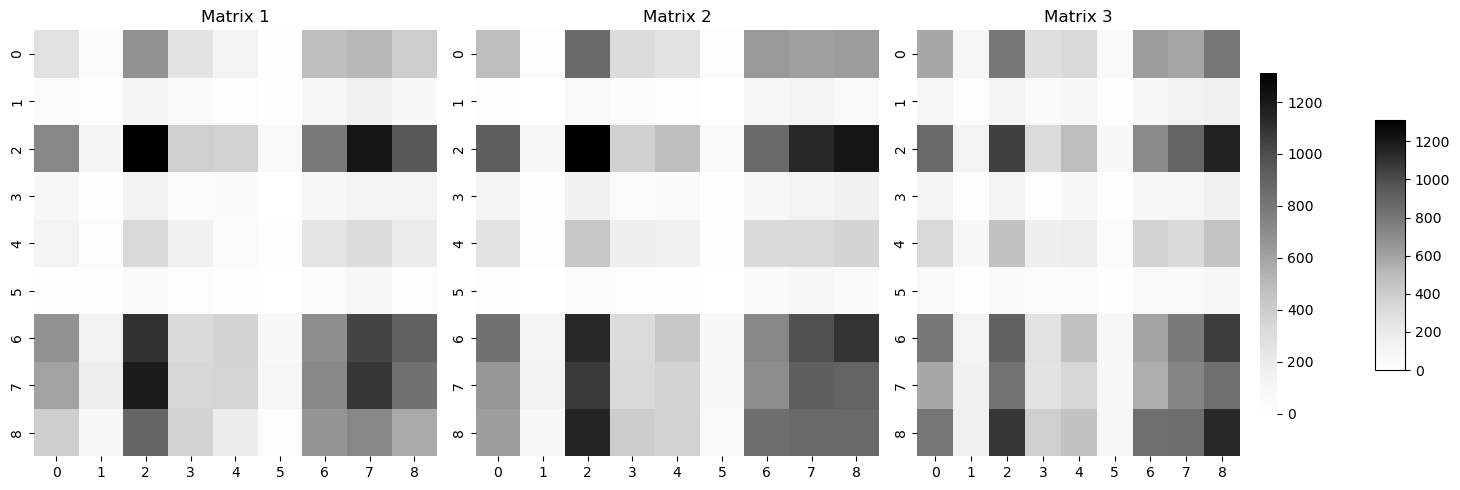

In [47]:
plot_heatmaps_with_shared_legend(matrix_a, matrix_b, matrix_c)

/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_31492/2900923557.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


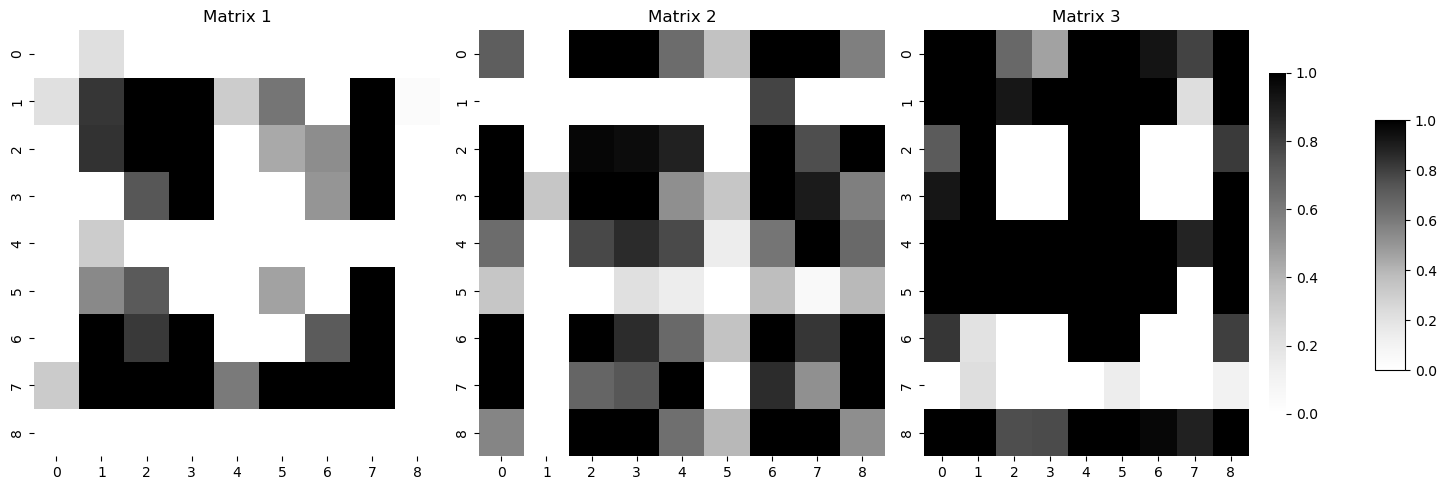

In [48]:
plot_heatmaps_with_shared_legend(norm_mat1, norm_mat2, norm_mat3)

In [49]:
def normalize_matrices_by_spherical_volume(mat1, mat2, mat3, radius=12):
    """
    Normalize each pixel in the three 9x9 matrices by dividing by the spherical volume 
    with a specified radius (default: 12 Ångströms).

    Parameters:
    mat1, mat2, mat3 (np.ndarray): Three 9x9 matrices.
    radius (float): Radius for the spherical volume calculation (default is 12 Ångströms).

    Returns:
    tuple: Normalized matrices for mat1, mat2, and mat3.
    """
    # Calculate the spherical volume
    volume = (4 / 3) * np.pi * radius**3
    
    # Normalize each matrix by dividing by the spherical volume
    norm_mat1 = mat1 / volume
    norm_mat2 = mat2 / volume
    norm_mat3 = mat3 / volume
    
    return norm_mat1, norm_mat2, norm_mat3

In [50]:
norm_mat1, norm_mat2, norm_mat3 = normalize_matrices_by_spherical_volume(matrix_a, matrix_b, matrix_c)

/var/folders/kn/zhrmr8_d087fgz3md9d4683w0000gn/T/ipykernel_31492/2900923557.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make room for the colorbar


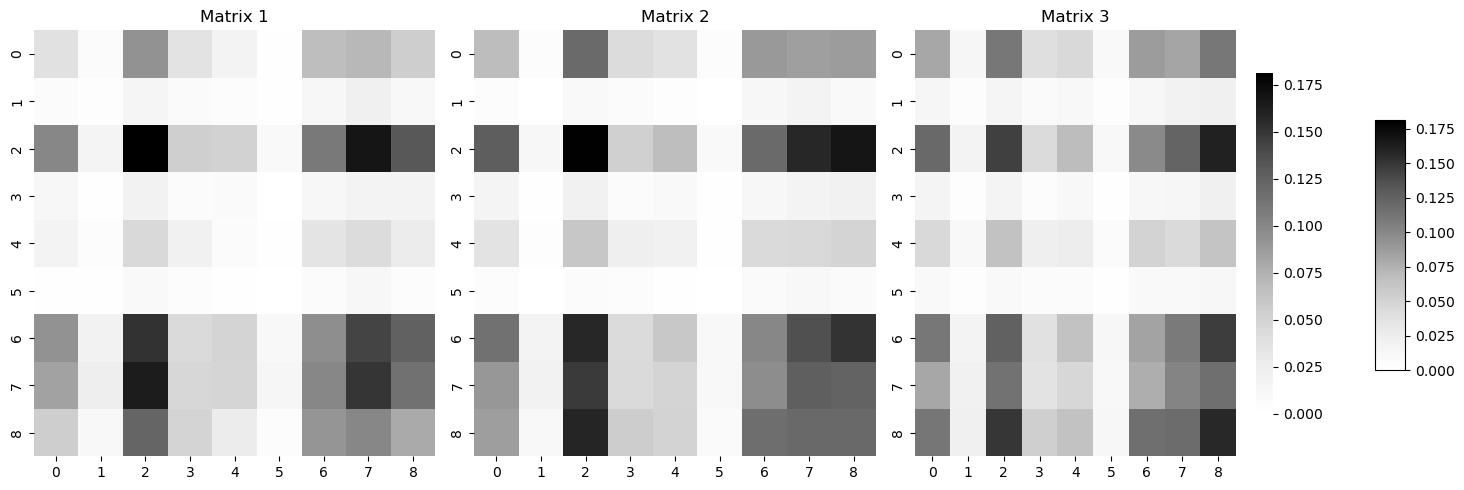

In [51]:
plot_heatmaps_with_shared_legend(norm_mat1, norm_mat2, norm_mat3)

In [52]:
df_list=[df_a.iloc[0].values,
         df_b.iloc[0].values,
         df_c.iloc[0].values]


results2=[]
for i in df_list:
    X_new = i.astype('float')

    # Reshape the new data for the CNN model (if necessary)
    X_new = X_new.reshape(1, -1, 1)

    # Make predictions
    predictions = model.predict(X_new)
    results2.append(predictions)
    # Print the predictions
    print(predictions)
# X[0]

1/1 [==============================] - 0s 30ms/step
[[12.739431]]
1/1 [==============================] - 0s 31ms/step
[[35.80567]]
1/1 [==============================] - 0s 24ms/step
[[40.256557]]


In [58]:

def plot_difference_heatmaps(mat1, mat2, mat3, title='', matrix1_name='Matrix 1 (A)',matrix2_name='Matrix 2 (B)',matrix3_name='Matrix 3 (C)',):
    """
    Subtracts matrices (mat2 - mat1) and (mat2 - mat3) and plots heatmaps 
    with a diverging color map (red for positive, blue for negative values).
    
    Parameters:
    mat1, mat2, mat3 (np.ndarray): Three normalized 9x9 matrices.
    """
    # Subtract mat1 from mat2 and mat3 from mat2
    diff1 = mat2 - mat1
    diff2 = mat2 - mat3
    diff3 = mat1 - mat3

    # Create a figure with 1 row and 2 columns
    fig, axes = plt.subplots(1, 3, figsize=(12, 6))

    # Plot heatmap for (mat2 - mat1)
    sns.heatmap(diff1, ax=axes[0], cmap="RdBu", center=0, cbar=True)
    axes[0].set_title(f'{matrix2_name} - {matrix1_name}')

    # Plot heatmap for (mat2 - mat3)
    sns.heatmap(diff2, ax=axes[1], cmap="RdBu", center=0, cbar=True)
    axes[1].set_title(f'{matrix2_name} - {matrix3_name}')

    sns.heatmap(diff3, ax=axes[2], cmap="RdBu", center=0, cbar=True)
    axes[2].set_title(f'{matrix1_name} - {matrix3_name}')

    # Add the main title above the entire figure
    plt.suptitle(title, fontsize=16, fontweight='bold')
    
    if title != '':
        plt.savefig(f'{title}.png')
    # Show the plots
    plt.tight_layout()
    plt.show()

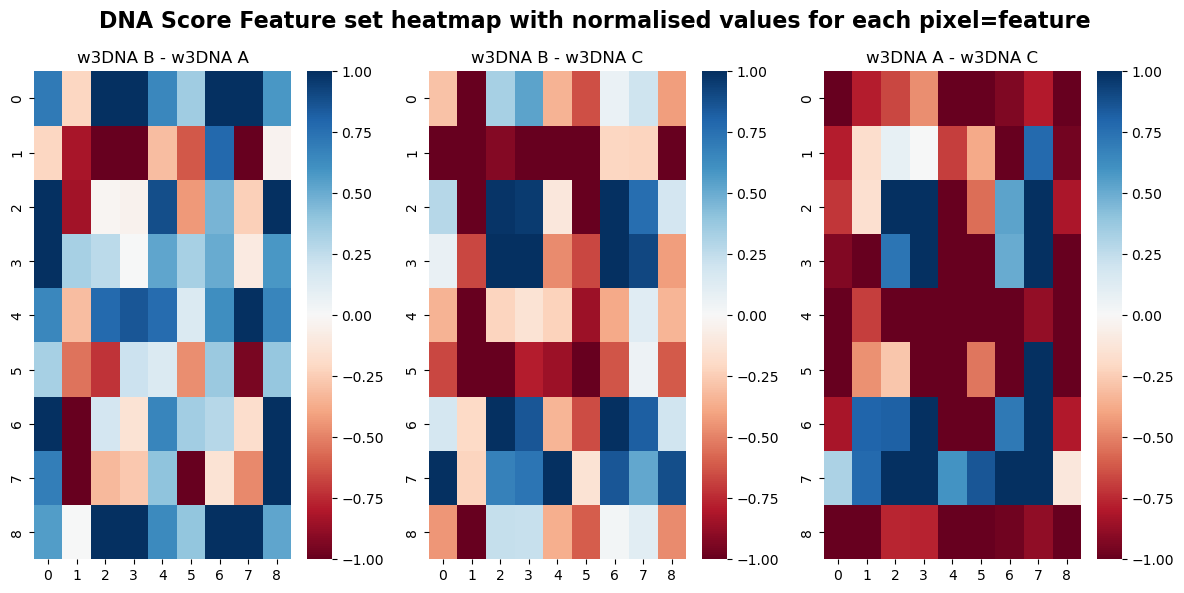

In [60]:
norm_mat1, norm_mat2, norm_mat3 = normalize_matrices(matrix_a, matrix_b, matrix_c)
plot_difference_heatmaps(norm_mat1, norm_mat2, norm_mat3, title = 'DNA Score Feature set heatmap with normalised values for each pixel=feature', matrix1_name='w3DNA A',matrix2_name='w3DNA B',matrix3_name='w3DNA C',)

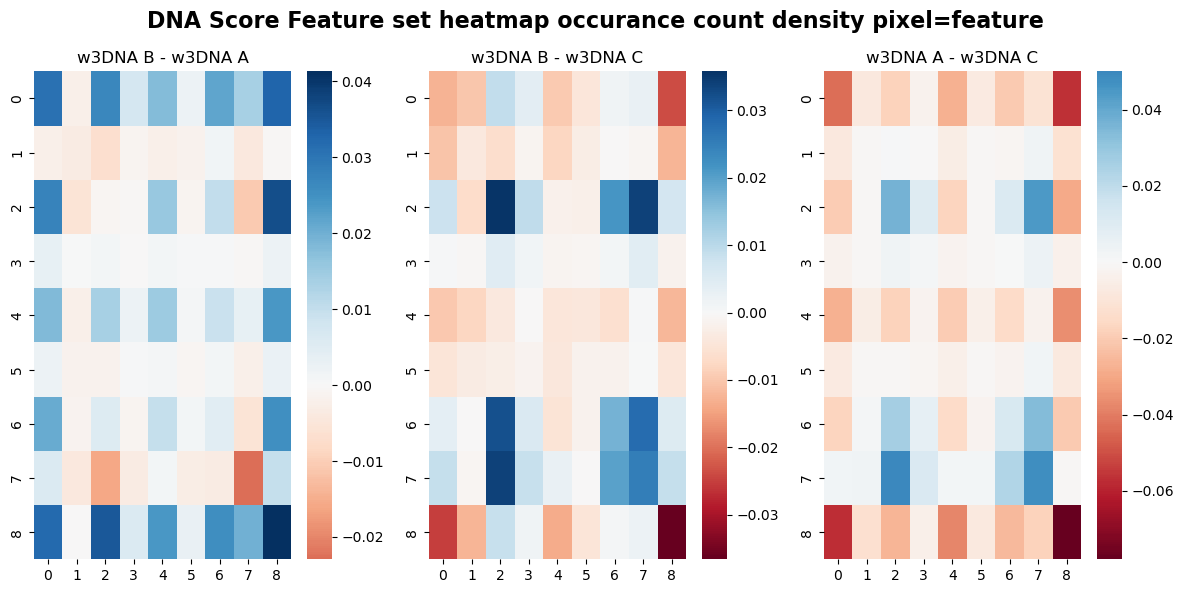

In [62]:
norm_mat1, norm_mat2, norm_mat3 = normalize_matrices_by_spherical_volume(matrix_a, matrix_b, matrix_c)
plot_difference_heatmaps(norm_mat1, norm_mat2, norm_mat3, title = 'DNA Score Feature set heatmap occurance count density pixel=feature', matrix1_name='w3DNA A',matrix2_name='w3DNA B',matrix3_name='w3DNA C',)

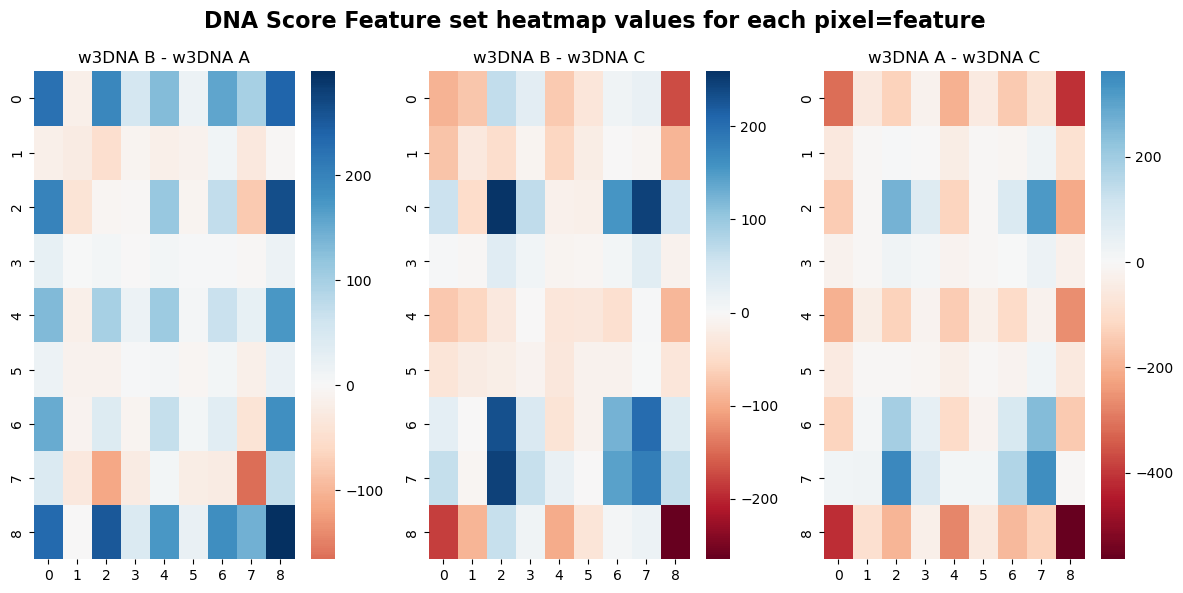

In [64]:
# norm_mat1, norm_mat2, norm_mat3 = normalize_matrices(matrix_a, matrix_b, matrix_c)
plot_difference_heatmaps(matrix_a, matrix_b, matrix_c, title = 'DNA Score Feature set heatmap values for each pixel=feature', matrix1_name='w3DNA A',matrix2_name='w3DNA B',matrix3_name='w3DNA C',)

# Vis A B C vs True values on avaialble 

In [71]:

data_path='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/'
df=pd.read_csv(data_path+'Lz_IY.csv')
X_df=df[['Tm','DNA']]
X_df
df2=pd.read_csv(data_path+'Mac_CNN_single_task.csv')
df2['DNA']=df2['Sequence']
X_df=pd.merge(X_df, df2, on='DNA', how='inner')
X_df=X_df.drop(['Unnamed: 0'],axis=1)
X_df=X_df[X_df.columns[:2]]
X_df


,Tm,DNA
0,16.9,aaaaaaaa
1,27.9,aaaaaaaaa
2,32.0,aaaaaaaaaa
3,35.7,aactggac
4,37.0,aagcgtag
...,...,...
300,28.7,ttcattcc
301,32.9,ttctggac
302,69.2,ttgaagatacgctggc
303,35.8,ttgtggac


In [74]:
df_vis_ABC[df_vis_ABC.columns[:2]]

,Sequence,Name_x
0,GTAGCTAC,GTAGCTAC_GTAGGTAG_CTACCTAC
1,CGTACG,CGTACG_CGTCGT_ACGACG
2,AGCCGTG,AGCCGTG_AGCAGC_GCTGCT
3,CAACCAACCAAC,CAACCAACCAAC_CAACCACAACCA_TGGTTGTGGTTG
4,CGATGTTCCAGTCA,CGATGTTCCAGTCA_CGATGTTCGATGTT_AACATCGAACATCG
...,...,...
255,ACTTGGAC,ACTTGGAC_ACTTACTT_AAGTAAGT
256,ATGAGCTCAT,ATGAGCTCAT_ATGAGATGAG_CTCATCTCAT
257,CGCTGTAA,CGCTGTAA_CGCTCGCT_AGCGAGCG
258,GCTCAGAC,GCTCAGAC_GCTCGCTC_GAGCGAGC


In [73]:
df_vis_ABC = pd.read_csv('send_to_mac_for_vis_A_B_C_vs_true.csv')
df_vis_ABC=df_vis_ABC[df_vis_ABC.columns[:2]]
df_vis_ABC.shape

(260, 2)

In [75]:

def check_and_load_data(df, file_type='B'):
    """
    Check if the file exists for each row in the DataFrame based on the 'Name_x' column
    and drop the row if the file doesn't exist. The function resets the DataFrame's index
    after dropping rows.

    Parameters:
    df (pd.DataFrame): The input DataFrame with a 'Name_x' column.
    file_type (str): The type of file (default: 'B').
    
    Returns:
    pd.DataFrame: The DataFrame with rows removed where the file doesn't exist.
    """
    rows_to_drop = []

    for idx, name in enumerate(df['Name_x']):
        # Construct the file path for each entry
        file_path = f"./DNAScore_traj/{file_type}/DNA_Score_{name}.csv"
        
        # Check if the file exists
        if not os.path.exists(file_path):
            # Mark the row index for removal if the file doesn't exist
            rows_to_drop.append(idx)
    
    # Drop the rows where files don't exist
    df_cleaned = df.drop(rows_to_drop)
    
    # Reset the index of the DataFrame
    df_cleaned = df_cleaned.reset_index(drop=True)
    
    return df_cleaned

In [76]:
for Type in ['A', 'B', 'C']:
    df_vis_ABC = check_and_load_data(df_vis_ABC, file_type=Type)

In [77]:
os.getcwd()

'/Users/ivanyankov/Documents/Chapter_DNA_Modelling/notebooks/experiments/Use_of_Synthetic_data'

In [137]:
df_vis_ABC.shape

(257, 2)

In [78]:


# Type='B'
for Type in ['A', 'B', 'C']:
    results=[]
    for i in df_vis_ABC['Name_x']:
        df_vis = load_dataframe(f"DNA_Score_{i}.csv", Type=Type)
        df_vis = df_vis.iloc[0].values

        X_new = df_vis.astype('float')

        # Reshape the new data for the CNN model (if necessary)
        X_new = X_new.reshape(1, -1, 1)

        # Make predictions
        predictions = model.predict(X_new)
        results.append(predictions)
        ## Print the predictions
        # print(predictions)

    df_vis_ABC[f'Tm_{Type}'] = results



1/1 [==============================] - 0s 27ms/step


In [79]:
df_vis_ABC

,Sequence,Name_x,Tm_A,Tm_B,Tm_C
0,GTAGCTAC,GTAGCTAC_GTAGGTAG_CTACCTAC,[[16.348219]],[[32.66522]],[[36.962006]]
1,CGTACG,CGTACG_CGTCGT_ACGACG,[[17.334297]],[[24.49798]],[[25.13833]]
2,AGCCGTG,AGCCGTG_AGCAGC_GCTGCT,[[13.040697]],[[24.004595]],[[27.19272]]
3,CAACCAACCAAC,CAACCAACCAAC_CAACCACAACCA_TGGTTGTGGTTG,[[27.461145]],[[53.593784]],[[56.1635]]
4,CGATGTTCCAGTCA,CGATGTTCCAGTCA_CGATGTTCGATGTT_AACATCGAACATCG,[[27.864094]],[[59.451145]],[[63.059605]]
...,...,...,...,...,...
252,ACTTGGAC,ACTTGGAC_ACTTACTT_AAGTAAGT,[[10.2809]],[[28.86047]],[[30.456713]]
253,ATGAGCTCAT,ATGAGCTCAT_ATGAGATGAG_CTCATCTCAT,[[17.321283]],[[40.158802]],[[43.926136]]
254,CGCTGTAA,CGCTGTAA_CGCTCGCT_AGCGAGCG,[[25.652567]],[[40.152966]],[[39.54783]]
255,GCTCAGAC,GCTCAGAC_GCTCGCTC_GAGCGAGC,[[24.643913]],[[40.316555]],[[38.75841]]


In [80]:
df_vis_ABC['Sequence'] = df_vis_ABC['Sequence'].str.lower()

# Perform an inner merge on 'Sequence' from df_vis_ABC and 'DNA' from X_df
merged_df = pd.merge(df_vis_ABC, X_df, left_on='Sequence', right_on='DNA', how='inner')

merged_df

,Sequence,Name_x,Tm_A,Tm_B,Tm_C,Tm,DNA
0,gtagctac,GTAGCTAC_GTAGGTAG_CTACCTAC,[[16.348219]],[[32.66522]],[[36.962006]],36.3,gtagctac
1,cgtacg,CGTACG_CGTCGT_ACGACG,[[17.334297]],[[24.49798]],[[25.13833]],25.0,cgtacg
2,agccgtg,AGCCGTG_AGCAGC_GCTGCT,[[13.040697]],[[24.004595]],[[27.19272]],39.0,agccgtg
3,caaccaaccaac,CAACCAACCAAC_CAACCACAACCA_TGGTTGTGGTTG,[[27.461145]],[[53.593784]],[[56.1635]],55.3,caaccaaccaac
4,cgatgttccagtca,CGATGTTCCAGTCA_CGATGTTCGATGTT_AACATCGAACATCG,[[27.864094]],[[59.451145]],[[63.059605]],62.4,cgatgttccagtca
...,...,...,...,...,...,...,...
252,acttggac,ACTTGGAC_ACTTACTT_AAGTAAGT,[[10.2809]],[[28.86047]],[[30.456713]],33.7,acttggac
253,atgagctcat,ATGAGCTCAT_ATGAGATGAG_CTCATCTCAT,[[17.321283]],[[40.158802]],[[43.926136]],50.3,atgagctcat
254,cgctgtaa,CGCTGTAA_CGCTCGCT_AGCGAGCG,[[25.652567]],[[40.152966]],[[39.54783]],36.7,cgctgtaa
255,gctcagac,GCTCAGAC_GCTCGCTC_GAGCGAGC,[[24.643913]],[[40.316555]],[[38.75841]],38.3,gctcagac


Metrics for Tm_A: {'R2': -3.114940527403, 'MAE': 20.374367735358064, 'RMSE': 21.697600515808414, 'Bias': -20.116428183674348, 'SDEP': 8.131124477874005, 'Gradient': 0.5462880874880801}
Metrics for Tm_B: {'R2': 0.5905831003444522, 'MAE': 5.208317707206488, 'RMSE': 6.844044271492568, 'Bias': -2.732789816559521, 'SDEP': 6.274775040482234, 'Gradient': 0.8506089634483804}
Metrics for Tm_C: {'R2': 0.6846157063509506, 'MAE': 4.41869687755748, 'RMSE': 6.006893860956011, 'Bias': -1.3625808346596209, 'SDEP': 5.850311728943108, 'Gradient': 0.8263071180839626}


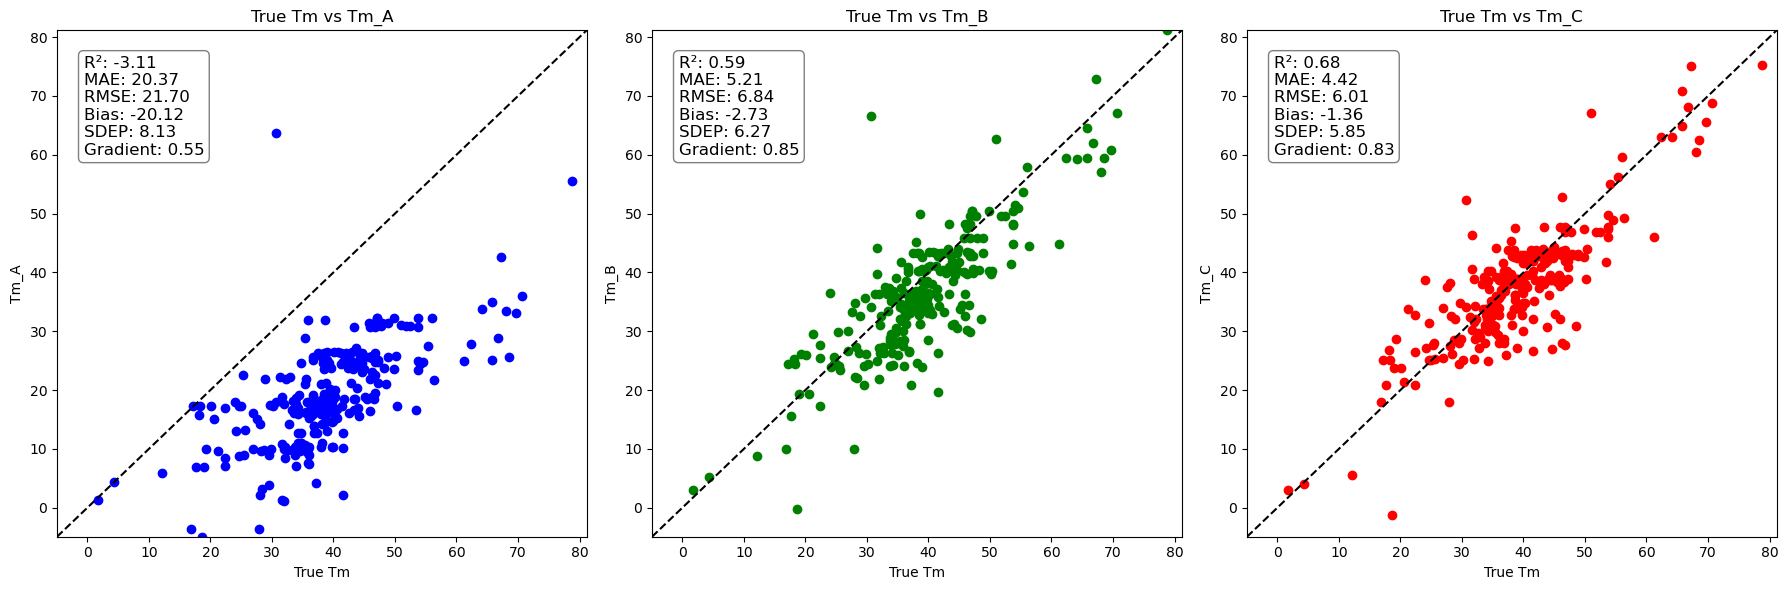

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import linregress

def compute_metrics(true_values, predicted_values):
    """
    Compute R^2, MAE, RMSE, Bias, SDEP, and the gradient of the straight line.

    Parameters:
    true_values (np.ndarray): Array of true values.
    predicted_values (np.ndarray): Array of predicted values.

    Returns:
    dict: A dictionary containing the computed metrics.
    """
    # R^2
    r2 = r2_score(true_values, predicted_values)
    
    # MAE
    mae = mean_absolute_error(true_values, predicted_values)
    
    # RMSE
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    
    # Bias
    bias = np.mean(predicted_values - true_values)
    
    # SDEP
    sdep = np.sqrt(np.mean((predicted_values - true_values - bias) ** 2))
    
    # Gradient (slope of the linear regression line)
    slope, intercept, r_value, p_value, std_err = linregress(true_values, predicted_values)
    
    return {
        'R2': r2,
        'MAE': mae,
        'RMSE': rmse,
        'Bias': bias,
        'SDEP': sdep,
        'Gradient': slope
    }

# def visualize_scatter(true_values, pred_A, pred_B, pred_C):
#     """
#     Create scatter plots of true values vs predicted values for A, B, and C.

#     Parameters:
#     true_values (np.ndarray): Array of true Tm values.
#     pred_A (np.ndarray): Array of Tm_A predicted values.
#     pred_B (np.ndarray): Array of Tm_B predicted values.
#     pred_C (np.ndarray): Array of Tm_C predicted values.
#     """
#     # Combine all the values to find the min and max range for plotting
#     all_values = np.concatenate([true_values, pred_A, pred_B, pred_C])
#     min_val, max_val = np.min(all_values), np.max(all_values)
    
#     # Create a 1x3 subplot layout
#     fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
#     # Scatter plot for Tm_A
#     axes[0].scatter(true_values, pred_A, color='blue')
#     axes[0].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
#     axes[0].set_title('True Tm vs Tm_A')
#     axes[0].set_xlabel('True Tm')
#     axes[0].set_ylabel('Tm_A')
#     axes[0].set_xlim([min_val, max_val])
#     axes[0].set_ylim([min_val, max_val])
    
#     # Scatter plot for Tm_B
#     axes[1].scatter(true_values, pred_B, color='green')
#     axes[1].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
#     axes[1].set_title('True Tm vs Tm_B')
#     axes[1].set_xlabel('True Tm')
#     axes[1].set_ylabel('Tm_B')
#     axes[1].set_xlim([min_val, max_val])
#     axes[1].set_ylim([min_val, max_val])
    
#     # Scatter plot for Tm_C
#     axes[2].scatter(true_values, pred_C, color='red')
#     axes[2].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
#     axes[2].set_title('True Tm vs Tm_C')
#     axes[2].set_xlabel('True Tm')
#     axes[2].set_ylabel('Tm_C')
#     axes[2].set_xlim([min_val, max_val])
#     axes[2].set_ylim([min_val, max_val])
    
#     # Adjust layout and show plot
#     plt.tight_layout()
#     plt.show()

# Example usage:

# Assuming df is the DataFrame with columns 'Tm', 'Tm_A', 'Tm_B', and 'Tm_C'
true_values = merged_df['Tm'].values
pred_A = merged_df['Tm_A'].values
pred_A = np.array([item[0][0] for item in pred_A])
pred_B = merged_df['Tm_B'].values
pred_B = np.array([item[0][0] for item in pred_B])
pred_C = merged_df['Tm_C'].values
pred_C = np.array([item[0][0] for item in pred_C])

# Compute metrics for each set of predictions
metrics_A = compute_metrics(true_values, pred_A)
metrics_B = compute_metrics(true_values, pred_B)
metrics_C = compute_metrics(true_values, pred_C)

# Print the metrics for each
print("Metrics for Tm_A:", metrics_A)
print("Metrics for Tm_B:", metrics_B)
print("Metrics for Tm_C:", metrics_C)

# Visualize the scatter plots
# visualize_scatter(true_values, pred_A, pred_B, pred_C)

def visualize_scatter_with_stats(true_values, pred_A, pred_B, pred_C, metrics_A, metrics_B, metrics_C):
    """
    Create scatter plots of true values vs predicted values for A, B, and C with a text box for statistics.

    Parameters:
    true_values (np.ndarray): Array of true Tm values.
    pred_A (np.ndarray): Array of Tm_A predicted values.
    pred_B (np.ndarray): Array of Tm_B predicted values.
    pred_C (np.ndarray): Array of Tm_C predicted values.
    metrics_A, metrics_B, metrics_C (dict): Dictionaries containing the computed statistics for A, B, and C.
    """
    # Combine all the values to find the min and max range for plotting
    all_values = np.concatenate([true_values, pred_A, pred_B, pred_C])
    min_val, max_val = np.min(all_values), np.max(all_values)
    
    # Create a 1x3 subplot layout
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Scatter plot for Tm_A
    axes[0].scatter(true_values, pred_A, color='blue')
    axes[0].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
    axes[0].set_title('True Tm vs Tm_A')
    axes[0].set_xlabel('True Tm')
    axes[0].set_ylabel('Tm_A')
    axes[0].set_xlim([min_val, max_val])
    axes[0].set_ylim([min_val, max_val])

    # Add a text box for statistics for Tm_A
    textstr_A = '\n'.join((
        f"R²: {metrics_A['R2']:.2f}",
        f"MAE: {metrics_A['MAE']:.2f}",
        f"RMSE: {metrics_A['RMSE']:.2f}",
        f"Bias: {metrics_A['Bias']:.2f}",
        f"SDEP: {metrics_A['SDEP']:.2f}",
        f"Gradient: {metrics_A['Gradient']:.2f}"
    ))
    props = dict(boxstyle='round', facecolor='white', alpha=0.5)
    axes[0].text(0.05, 0.95, textstr_A, transform=axes[0].transAxes, fontsize=12,
                 verticalalignment='top', bbox=props)
    
    # Scatter plot for Tm_B
    axes[1].scatter(true_values, pred_B, color='green')
    axes[1].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
    axes[1].set_title('True Tm vs Tm_B')
    axes[1].set_xlabel('True Tm')
    axes[1].set_ylabel('Tm_B')
    axes[1].set_xlim([min_val, max_val])
    axes[1].set_ylim([min_val, max_val])

    # Add a text box for statistics for Tm_B
    textstr_B = '\n'.join((
        f"R²: {metrics_B['R2']:.2f}",
        f"MAE: {metrics_B['MAE']:.2f}",
        f"RMSE: {metrics_B['RMSE']:.2f}",
        f"Bias: {metrics_B['Bias']:.2f}",
        f"SDEP: {metrics_B['SDEP']:.2f}",
        f"Gradient: {metrics_B['Gradient']:.2f}"
    ))
    axes[1].text(0.05, 0.95, textstr_B, transform=axes[1].transAxes, fontsize=12,
                 verticalalignment='top', bbox=props)

    # Scatter plot for Tm_C
    axes[2].scatter(true_values, pred_C, color='red')
    axes[2].plot([min_val, max_val], [min_val, max_val], color='black', linestyle='--')
    axes[2].set_title('True Tm vs Tm_C')
    axes[2].set_xlabel('True Tm')
    axes[2].set_ylabel('Tm_C')
    axes[2].set_xlim([min_val, max_val])
    axes[2].set_ylim([min_val, max_val])

    # Add a text box for statistics for Tm_C
    textstr_C = '\n'.join((
        f"R²: {metrics_C['R2']:.2f}",
        f"MAE: {metrics_C['MAE']:.2f}",
        f"RMSE: {metrics_C['RMSE']:.2f}",
        f"Bias: {metrics_C['Bias']:.2f}",
        f"SDEP: {metrics_C['SDEP']:.2f}",
        f"Gradient: {metrics_C['Gradient']:.2f}"
    ))
    axes[2].text(0.05, 0.95, textstr_C, transform=axes[2].transAxes, fontsize=12,
                 verticalalignment='top', bbox=props)
    
    # Adjust layout and show plot
    plt.savefig('CNN_Tm_50_epochs_single_split_A_B_C.png')
    plt.tight_layout()
    plt.show()

# Example usage after computing metrics for Tm_A, Tm_B, and Tm_C:
visualize_scatter_with_stats(true_values, pred_A, pred_B, pred_C, metrics_A, metrics_B, metrics_C)




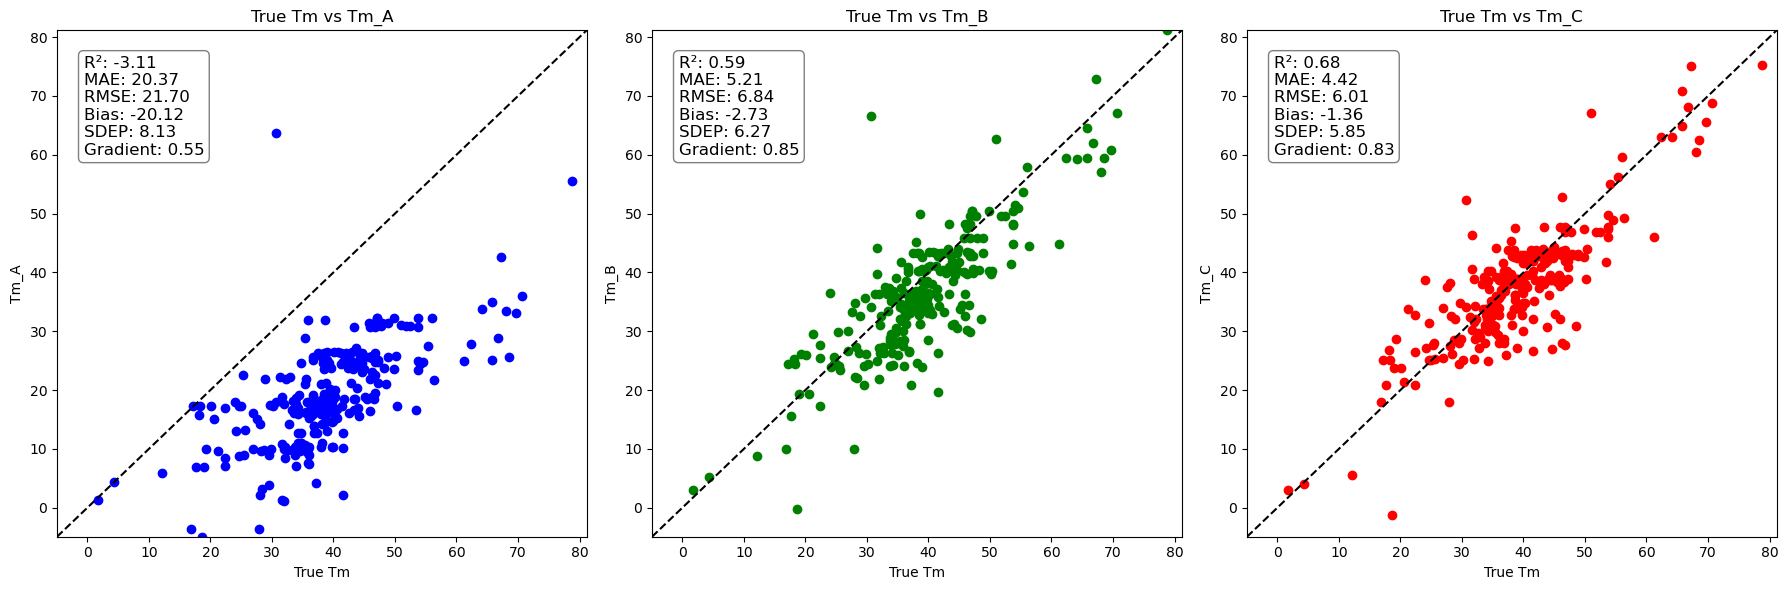

In [82]:
visualize_scatter_with_stats(true_values, pred_A, pred_B, pred_C, metrics_A, metrics_B, metrics_C)

# Show the descriptor difference between NAB B and w3DNA B

In [83]:

data_path='/Users/ivanyankov/Documents/Chapter_DNA_Modelling/data/processed/'
df=pd.read_csv(data_path+'Lz_IY.csv')
X_df_desc_diff=df[['Tm','DNA']]
X_df_desc_diff
df2=pd.read_csv(data_path+'Mac_CNN_single_task.csv')
df2['DNA']=df2['Sequence']
X_df_desc_diff=pd.merge(X_df_desc_diff, df2, on='DNA', how='inner')
# X_df_desc_diff=X_df_desc_diff.drop(['Tm','Unnamed: 0','DNA'],axis=1)
X_df_desc_diff=X_df_desc_diff.drop(['Unnamed: 0','DNA'],axis=1)
X_df_desc_diff

,Tm,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')",...,"('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')",Sequence
0,16.9,434,60,635,343,273,47,310,408,634,...,634,94,828,463,354,69,413,558,811,aaaaaaaa
1,27.9,514,73,736,396,323,57,359,474,747,...,747,114,962,534,418,84,477,649,957,aaaaaaaaa
2,32.0,594,86,837,449,373,67,408,540,860,...,860,134,1096,605,482,99,541,740,1103,aaaaaaaaaa
3,35.7,434,60,687,203,273,47,548,514,634,...,634,94,903,284,354,69,738,675,811,aactggac
4,37.0,434,60,662,201,273,47,522,512,634,...,634,94,872,284,354,69,702,670,811,aagcgtag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,28.7,434,60,792,120,273,47,724,573,634,...,634,94,1073,161,354,69,985,774,811,ttcattcc
301,32.9,434,60,728,118,273,47,669,553,634,...,634,94,973,164,354,69,907,724,811,ttctggac
302,69.2,1074,164,1566,387,673,127,1289,1182,1538,...,1538,254,2083,535,866,189,1732,1558,1979,ttgaagatacgctggc
303,35.8,434,60,692,113,273,47,621,536,634,...,634,94,921,162,354,69,841,696,811,ttgtggac


In [84]:
# Initialize empty lists to store data for each Type
descriptors_a = []
descriptors_b = []
descriptors_c = []

# Iterate over each Type and load data
for Type in ['A', 'B', 'C']:
    for i in df_vis_ABC['Name_x']:
        # Load the corresponding dataframe for each type
        df_vis_df = load_dataframe(f"DNA_Score_{i}.csv", Type=Type)
        df_vis = df_vis_df.iloc[0].values  # Extract the first row's values
        
        # Append data to the correct list based on Type
        if Type == 'A':
            descriptors_a.append(df_vis)
        elif Type == 'B':
            descriptors_b.append(df_vis)
        elif Type == 'C':
            descriptors_c.append(df_vis)

# Convert the list of data (81 columns) to a DataFrame for each type
df_a_desc = pd.DataFrame(descriptors_a, columns=df_vis_df.columns)
df_b_desc = pd.DataFrame(descriptors_b, columns=df_vis_df.columns)
df_c_desc = pd.DataFrame(descriptors_c, columns=df_vis_df.columns)

# Add the 'Sequence' column from df_vis_ABC to each DataFrame
df_a_desc['Sequence'] = df_vis_ABC['Sequence'].values
df_b_desc['Sequence'] = df_vis_ABC['Sequence'].values
df_c_desc['Sequence'] = df_vis_ABC['Sequence'].values

# Now df_a_desc, df_b_desc, and df_c_desc are ready

In [85]:
df_c_desc
# df_vis_df.colums
# df_vis_df = load_dataframe(f"DNA_Score_{i}.csv", Type=Type)
# df_vis_df
# df_vis_df.columns
                           

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')",Sequence
0,406,66,557,174,226,43,464,384,567,62,...,570,98,736,235,323,57,608,556,806,gtagctac
1,238,26,455,78,127,17,451,335,338,25,...,336,42,598,101,181,26,594,487,476,cgtacg
2,237,29,391,151,127,19,343,285,337,26,...,337,42,516,213,188,28,444,415,476,agccgtg
3,758,142,1032,371,435,94,888,784,1042,144,...,1041,218,1408,499,599,120,1183,1138,1476,caaccaaccaac
4,941,185,1228,234,536,118,1147,870,1280,185,...,1271,277,1673,316,733,154,1514,1254,1800,cgatgttccagtca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,410,64,699,110,228,42,667,497,579,65,...,570,98,940,152,316,58,872,721,818,acttggac
253,584,108,717,251,331,70,578,510,796,102,...,807,163,960,349,466,87,752,730,1133,atgagctcat
254,407,65,684,124,230,42,689,508,579,68,...,572,101,922,166,318,58,913,732,816,cgctgtaa
255,407,65,688,123,228,42,687,499,579,66,...,571,98,926,168,317,60,914,712,817,gctcagac


In [86]:
# Perform an inner merge on the 'Sequence' column
merged_df_desc = pd.merge(X_df_desc_diff, df_c_desc, on='Sequence', how='inner', suffixes=('_X', '_C'))

# Ensure the merged DataFrame is sorted according to the order of 'Sequence' in df_c_desc
merged_df_desc = merged_df_desc.set_index('Sequence')
merged_df_desc = merged_df_desc.loc[df_c_desc['Sequence']]

# Reset index if needed
merged_df_desc = merged_df_desc.reset_index()
merged_df_desc

merged_df_desc_x = merged_df_desc.filter(like='_X')
# Rename columns by removing the '_X' suffix
merged_df_desc_x.columns = merged_df_desc_x.columns.str.replace('_X', '')
merged_df_desc_x

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,434,60,711,176,273,47,593,525,634,60,...,700,634,94,945,243,354,69,800,700,811
1,274,34,487,114,173,27,429,370,408,34,...,495,408,54,646,158,226,39,583,495,519
2,354,47,590,144,223,37,525,470,521,47,...,623,521,74,777,204,290,54,709,615,665
3,754,112,1182,436,473,87,894,821,1086,112,...,1193,1086,174,1572,581,610,129,1210,1116,1395
4,914,138,1408,296,573,107,1235,1064,1312,138,...,1342,1312,214,1884,408,738,159,1669,1408,1687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,434,60,711,152,273,47,617,542,634,60,...,705,634,94,941,215,354,69,833,710,811
253,594,86,936,229,373,67,777,697,860,86,...,929,860,134,1247,316,482,99,1050,929,1103
254,434,60,710,149,273,47,637,548,634,60,...,702,634,94,951,207,354,69,860,719,811
255,434,60,715,194,273,47,604,528,634,60,...,709,634,94,946,265,354,69,818,701,811


In [99]:
df_b_desc

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')",Sequence
0,360,23,613,169,191,24,512,450,458,21,...,462,51,798,214,272,37,666,616,648,gtagctac
1,236,12,491,80,124,14,470,366,299,14,...,301,26,644,102,172,21,624,504,426,cgtacg
2,237,12,432,158,124,13,360,316,302,12,...,299,30,568,209,173,21,469,431,429,agccgtg
3,613,40,1106,412,329,47,880,785,787,39,...,778,96,1471,530,458,70,1138,1113,1086,caaccaaccaac
4,744,50,1307,237,399,56,1189,958,946,47,...,956,114,1730,294,550,85,1562,1312,1320,cgatgttccagtca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,367,21,742,128,192,24,668,525,462,21,...,467,51,981,167,267,37,878,727,649,acttggac
253,490,31,786,254,260,34,620,580,624,31,...,622,74,1036,322,369,53,809,799,871,atgagctcat
254,362,21,729,133,190,23,701,535,456,21,...,458,48,958,174,262,37,921,735,641,cgctgtaa
255,361,22,731,136,190,24,701,521,458,21,...,461,49,961,181,261,37,913,717,643,gctcagac


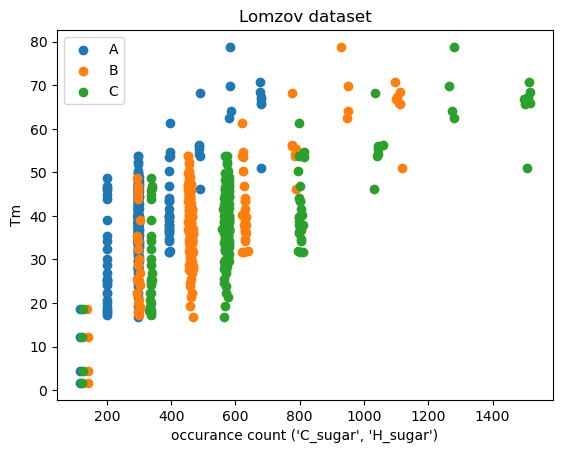

In [113]:

i=8
plt.scatter(df_a_desc[df_a_desc.columns[i]],merged_df_desc['Tm'],label='A')
plt.scatter(df_b_desc[df_a_desc.columns[i]],merged_df_desc['Tm'],label='B')
plt.scatter(df_c_desc[df_a_desc.columns[i]],merged_df_desc['Tm'],label='C')
plt.legend()
plt.title('Lomzov dataset')
plt.ylabel('Tm')
plt.xlabel(f'occurance count {df_a_desc.columns[i]}')
plt.savefig('Lomzov_dataset_w3DNA_ABC_types_vs_Tm.png')

# Just do a RMSD on C, P,N,O atoms on NAB B type and w3DNA B type

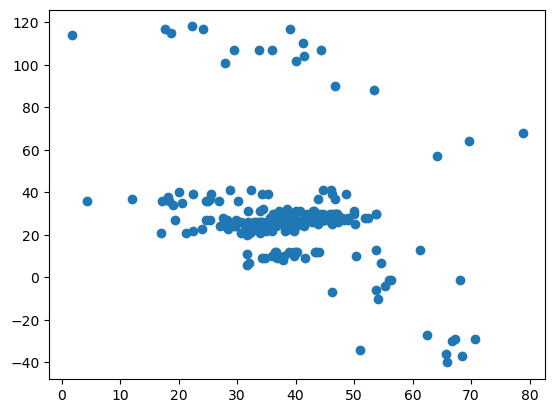

In [216]:
plt.scatter(merged_df_desc['Tm'],(merged_df_desc_x-df_c_desc[df_c_desc.columns[:-1]])[df_c_desc.columns[0]])

In [203]:
merged_df_desc_x-df_c_desc[df_c_desc.columns[:-1]]

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,28,-6,154,2,47,4,129,141,67,-2,...,-44,64,-4,209,8,31,12,192,144,5
1,36,8,32,36,46,10,-22,35,70,9,...,60,72,12,48,57,45,13,-11,8,43
2,117,18,199,-7,96,18,182,185,184,21,...,148,184,32,261,-9,102,26,265,200,189
3,-4,-30,150,65,38,-7,6,37,44,-32,...,225,45,-44,164,82,11,9,27,-22,-81
4,-27,-47,180,62,37,-11,88,194,32,-47,...,75,41,-63,211,92,5,5,155,154,-113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,24,-4,12,42,45,5,-50,45,55,-5,...,135,64,-4,1,63,38,11,-39,-11,-7
253,10,-22,219,-22,42,-3,199,187,64,-16,...,-56,53,-29,287,-33,16,12,298,199,-30
254,27,-5,26,25,43,5,-52,40,55,-8,...,118,62,-7,29,41,36,11,-53,-13,-5
255,27,-5,27,71,45,5,-83,29,55,-6,...,145,63,-4,20,97,37,9,-96,-11,-6


In [204]:
merged_df_desc_x-df_b_desc[df_b_desc.columns[:-1]]

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,74,37,98,7,82,23,81,75,176,39,...,-29,172,43,147,29,82,32,134,84,163
1,38,22,-4,34,49,13,-41,4,109,20,...,45,107,28,2,56,54,18,-41,-9,93
2,117,35,158,-14,99,24,165,154,219,35,...,135,222,44,209,-5,117,33,240,184,236
3,141,72,76,24,144,40,14,36,299,73,...,129,308,78,101,51,152,59,72,3,309
4,170,88,101,59,174,51,46,106,366,91,...,68,356,100,154,114,188,74,107,96,367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,67,39,-31,24,81,23,-51,17,172,39,...,95,167,43,-40,48,87,32,-45,-17,162
253,104,55,150,-25,113,33,157,117,236,55,...,-55,238,60,211,-6,113,46,241,130,232
254,72,39,-19,16,83,24,-64,13,178,39,...,80,176,46,-7,33,92,32,-61,-16,170
255,73,38,-16,58,83,23,-97,7,176,39,...,108,173,45,-15,84,93,32,-95,-16,168


In [205]:
merged_df_desc_x-df_a_desc[df_a_desc.columns[:-1]]

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,229,50,226,48,182,44,183,116,336,50,...,72,336,74,304,68,222,57,240,128,377
1,132,34,95,45,115,27,39,40,208,34,...,101,209,53,131,59,147,35,60,39,232
2,212,47,237,7,165,37,244,195,321,47,...,168,321,73,313,13,211,50,332,231,378
3,417,27,327,94,303,56,220,179,599,27,...,209,601,48,432,104,366,78,310,195,691
4,511,14,399,108,361,62,299,213,731,15,...,242,728,35,568,147,435,87,412,248,843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,227,49,123,39,179,44,74,67,335,49,...,157,336,73,168,55,223,57,105,55,373
253,323,39,316,32,243,50,292,189,466,39,...,88,467,60,429,40,290,67,392,214,527
254,229,49,143,31,181,44,74,81,336,50,...,144,336,75,206,41,223,57,110,71,377
255,227,49,140,77,179,44,36,61,335,49,...,158,336,73,190,100,223,57,58,44,375


In [206]:
merged_df_desc_x-merged_df_desc_x

,"('C_sugar', 'C_sugar')","('C_sugar', 'O_backbone')","('C_sugar', 'C_nucleobase')","('C_sugar', 'O_nucleobase')","('C_sugar', 'O_sugar')","('C_sugar', 'P_backbone')","('C_sugar', 'N_nucleobase')","('C_sugar', 'H_nucleobase')","('C_sugar', 'H_sugar')","('O_backbone', 'C_sugar')",...,"('H_nucleobase', 'H_sugar')","('H_sugar', 'C_sugar')","('H_sugar', 'O_backbone')","('H_sugar', 'C_nucleobase')","('H_sugar', 'O_nucleobase')","('H_sugar', 'O_sugar')","('H_sugar', 'P_backbone')","('H_sugar', 'N_nucleobase')","('H_sugar', 'H_nucleobase')","('H_sugar', 'H_sugar')"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
253,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
